# which features are responsible for increase or decrease in the number of parking tickets??????

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install dask[dataframe]

     |████████████████████████████████| 112kB 7.2MB/s 


In [3]:

import dask.dataframe as dd
from dask.diagnostics import ProgressBar

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from functools import reduce

In [6]:
fy14 = dd.read_csv("/content/drive/MyDrive/dask_data/Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv")
fy15 = dd.read_csv("/content/drive/MyDrive/dask_data/Parking_Violations_Issued_-_Fiscal_Year_2015.csv")
fy16 = dd.read_csv("/content/drive/MyDrive/dask_data/Parking_Violations_Issued_-_Fiscal_Year_2016.csv")
fy17 = dd.read_csv("/content/drive/MyDrive/dask_data/Parking_Violations_Issued_-_Fiscal_Year_2017.csv")

In [7]:
columns = [set(fy14.columns),set(fy15.columns),set(fy16.columns),set(fy17.columns)]
common_columns = list(reduce(lambda x,y: x.intersection(y),columns))

In [8]:
dtypes={'Date First Observed': np.str,
 'Days Parking In Effect    ': np.str,
 'Double Parking Violation': np.str,
 'Feet From Curb': np.float32,
 'From Hours In Effect': np.str,
 'House Number': np.str,
 'Hydrant Violation': np.str,
 'Intersecting Street': np.str,
 'Issue Date': np.str,
 'Issuer Code': np.float32,
 'Issuer Command': np.str,
 'Issuer Precinct': np.float32,
 'Issuer Squad': np.str,
 'Issuing Agency': np.str,
 'Law Section': np.float32,
 'Meter Number': np.str,
 'No Standing or Stopping Violation': np.str,
 'Plate ID': np.str,
 'Plate Type': np.str,
 'Registration State': np.str,
 'Street Code1': np.uint32,
 'Street Code2': np.uint32,
 'Street Code3': np.uint32,
 'Street Name': np.str,
 'Sub Division': np.str,
 'Summons Number': np.uint32,
 'Time First Observed': np.str,
 'To Hours In Effect': np.str,
 'Unregistered Vehicle?': np.str,
 'Vehicle Body Type': np.str,
 'Vehicle Color': np.str,
 'Vehicle Expiration Date': np.str,
 'Vehicle Make': np.str,
 'Vehicle Year': np.float32,
 'Violation Code': np.uint16,
 'Violation County': np.str,
 'Violation Description': np.str,
 'Violation In Front Of Or Opposite': np.str,
 'Violation Legal Code': np.str,
 'Violation Location': np.str,
 'Violation Post Code': np.str,
 'Violation Precinct': np.float32,
 'Violation Time': np.str
       }


In [9]:
fy14 = dd.read_csv("/content/drive/MyDrive/dask_data/Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv",usecols=common_columns,dtype=dtypes)
fy15 = dd.read_csv("/content/drive/MyDrive/dask_data/Parking_Violations_Issued_-_Fiscal_Year_2015.csv",usecols=common_columns,dtype=dtypes)
fy16 = dd.read_csv("/content/drive/MyDrive/dask_data/Parking_Violations_Issued_-_Fiscal_Year_2016.csv",usecols=common_columns,dtype=dtypes)
fy17 = dd.read_csv("/content/drive/MyDrive/dask_data/Parking_Violations_Issued_-_Fiscal_Year_2017.csv",usecols=common_columns,dtype=dtypes)

In [10]:
fy =dd.concat([fy14,fy15,fy16,fy17],axis=0)

In [11]:
columns_to_drop = ['Vehicle Color','Plate ID','Issuing Agency','Vehicle Expiration Date',
               'Violation Location','Issuer Command','Issuer Squad','Time First Observed',
              'Violation In Front Of Or Opposite','House Number','Street Name','Intersecting Street','Date First Observed',
              'Sub Division','Violation Legal Code','From Hours In Effect','To Hours In Effect','Meter Number','Feet From Curb',
              'Hydrant Violation','Double Parking Violation','Violation Post Code','No Standing or Stopping Violation']

In [12]:
fy.head()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Time First Observed,Violation County,Violation In Front Of Or Opposite,House Number,Street Name,Intersecting Street,Date First Observed,Law Section,Sub Division,Violation Legal Code,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,1283294138,GBB9093,NY,PAS,08/04/2013,46,SUBN,AUDI,P,37250,13610,21190,20140831,0033,33.0,33.0,921043.0,0033,0000,0752A,NaN,NaN,F,712,W 175 ST,NaN,0,408.0,F1,NaN,BBBBBBB,ALL,ALL,GY,0,2013.0,-,0.0,NaN,NaN,NaN,NaN,NaN
1,1283294151,62416MB,NY,COM,08/04/2013,46,VAN,FORD,P,37290,40404,40404,20140430,0033,33.0,33.0,921043.0,0033,0000,1240P,NaN,NY,O,201,W 177 ST,NaN,0,408.0,C,NaN,BBBBBBB,ALL,ALL,WH,0,2012.0,-,0.0,NaN,NaN,NaN,NaN,NaN
2,1283294163,78755JZ,NY,COM,08/05/2013,46,P-U,CHEVR,P,37030,31190,13610,20140228,0033,33.0,33.0,921043.0,0033,0000,1243P,NaN,NY,O,520,W 163 ST,NaN,0,408.0,F7,NaN,BBBBBBB,ALL,ALL,NaN,0,0.0,-,0.0,NaN,NaN,NaN,NaN,NaN
3,1283294175,63009MA,NY,COM,08/05/2013,46,VAN,FORD,P,37270,11710,12010,20141031,0033,33.0,33.0,921043.0,0033,0000,0232P,NaN,NY,O,517,W 176 ST,NaN,0,408.0,F1,NaN,BBBBBBB,ALL,ALL,WH,0,2010.0,-,0.0,NaN,NaN,NaN,NaN,NaN
4,1283294187,91648MC,NY,COM,08/08/2013,41,TRLR,GMC,P,37240,12010,31190,0,0033,33.0,33.0,921043.0,0033,0000,1239P,NaN,NY,F,590,W 174 ST,NaN,0,408.0,E1,NaN,BBBBBBB,ALL,ALL,BR,0,2012.0,-,0.0,NaN,NaN,NaN,NaN,NaN


In [14]:
with ProgressBar():
        data = fy.drop(columns_to_drop,axis=1).compute()

[########################################] | 100% Completed |  4min 51.5s


In [15]:
data.head()

,Summons Number,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Street Code1,Street Code2,Street Code3,Violation Precinct,Issuer Precinct,Issuer Code,Violation Time,Violation County,Law Section,Days Parking In Effect,Unregistered Vehicle?,Vehicle Year,Violation Description
0,1283294138,NY,PAS,08/04/2013,46,SUBN,AUDI,37250,13610,21190,33.0,33.0,921043.0,0752A,NaN,408.0,BBBBBBB,0,2013.0,NaN
1,1283294151,NY,COM,08/04/2013,46,VAN,FORD,37290,40404,40404,33.0,33.0,921043.0,1240P,NY,408.0,BBBBBBB,0,2012.0,NaN
2,1283294163,NY,COM,08/05/2013,46,P-U,CHEVR,37030,31190,13610,33.0,33.0,921043.0,1243P,NY,408.0,BBBBBBB,0,0.0,NaN
3,1283294175,NY,COM,08/05/2013,46,VAN,FORD,37270,11710,12010,33.0,33.0,921043.0,0232P,NY,408.0,BBBBBBB,0,2010.0,NaN
4,1283294187,NY,COM,08/08/2013,41,TRLR,GMC,37240,12010,31190,33.0,33.0,921043.0,1239P,NY,408.0,BBBBBBB,0,2012.0,NaN


In [37]:
corr=data.corr( method='pearson')

In [38]:
corr.head()

,Summons Number,Violation Code,Street Code1,Street Code2,Street Code3,Violation Precinct,Issuer Precinct,Issuer Code,Law Section,Vehicle Year
Summons Number,1.000000,0.080118,0.324586,0.214768,0.224672,0.302288,0.126804,0.094536,-0.703685,-0.129257
Violation Code,0.080118,1.000000,0.085219,0.094581,0.094990,0.175573,0.131635,0.232991,-0.231190,0.008802
Street Code1,0.324586,0.085219,1.000000,0.425152,0.423669,0.383627,0.233090,0.311345,-0.472149,-0.092881
Street Code2,0.214768,0.094581,0.425152,1.000000,0.670815,0.319657,0.212063,0.321989,-0.388299,-0.070361
Street Code3,0.224672,0.094990,0.423669,0.670815,1.000000,0.322557,0.211284,0.318284,-0.394844,-0.071838


### correlation matrix is a table showing correlation coefficients between


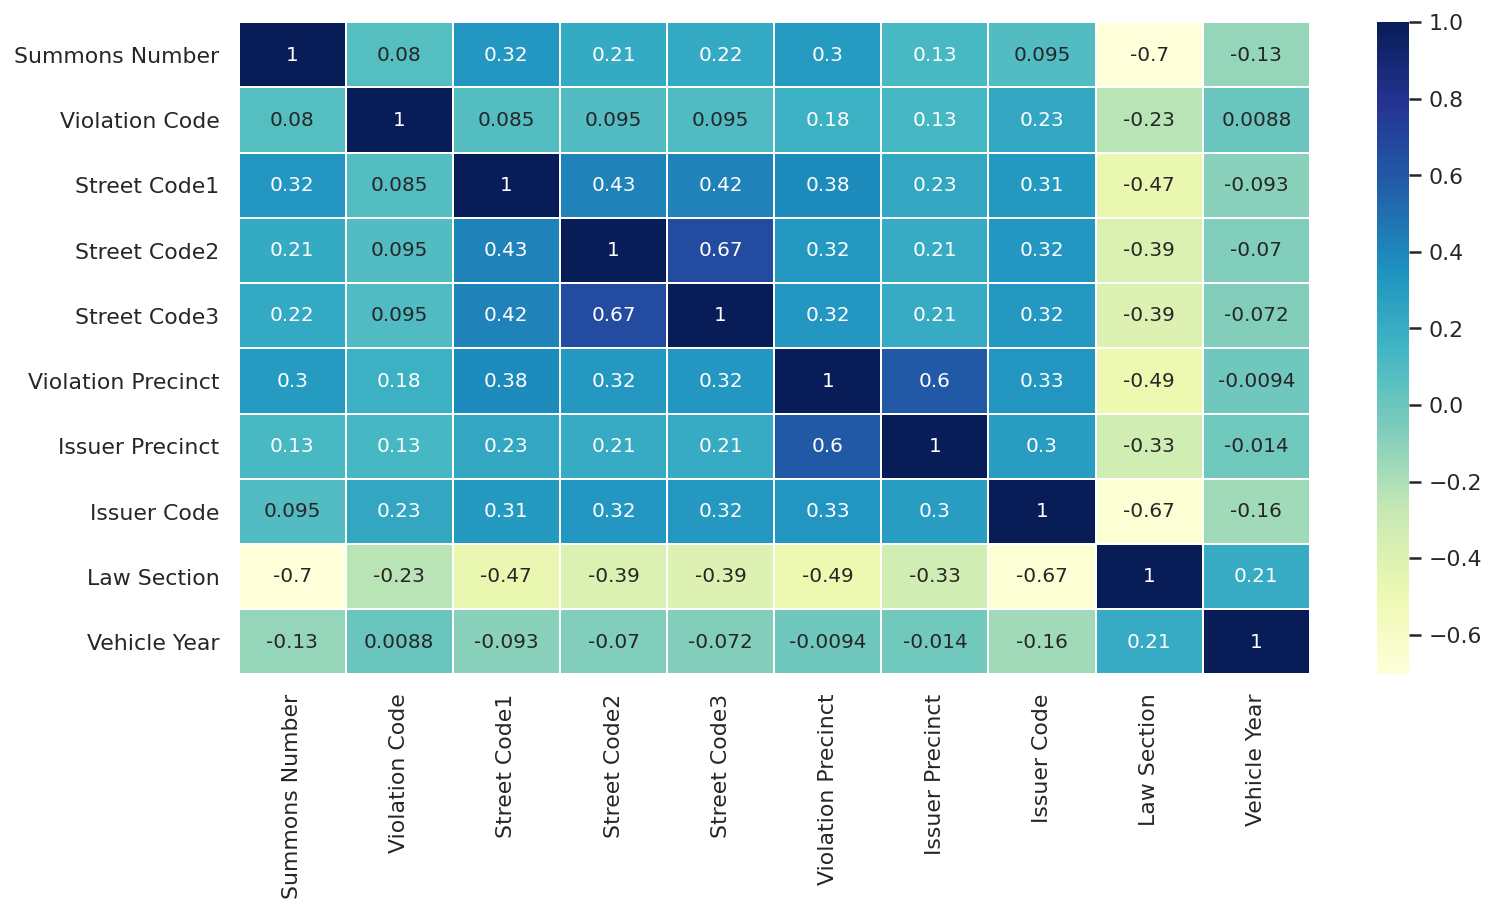

In [39]:
plt.figure(figsize=(12,6))
sns.heatmap(corr,linewidths=.5,cmap="YlGnBu",annot=True)

In [22]:
sns.set(color_codes=True)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


# **How the number of tickets given changes with each month????**

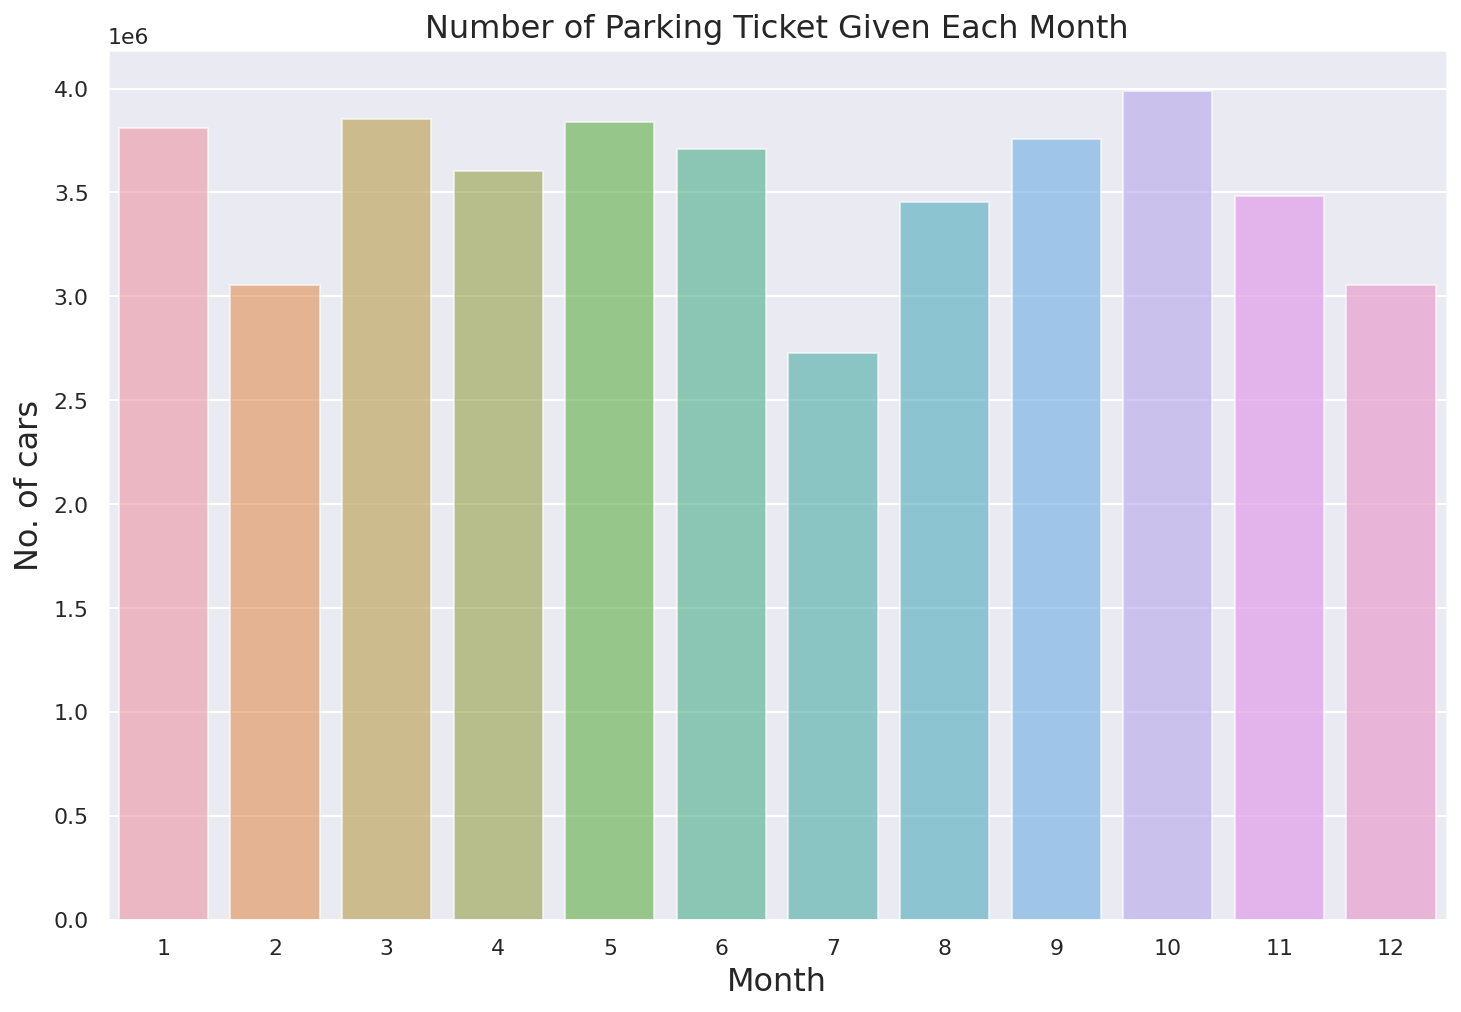

In [23]:
month = []
for time in pd.to_datetime(data['Issue Date']):
    month.append(time.month)
count = pd.Series(month).value_counts()

plt.figure(figsize=(12,8))
sns.barplot(y=count.values, x=count.index, alpha=0.6)
plt.title("Number of Parking Ticket Given Each Month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.ylabel("No. of cars", fontsize=16)
plt.show();


So from the barplot above  October has the highest number of tickets!


## Barplot of 'Registration State'

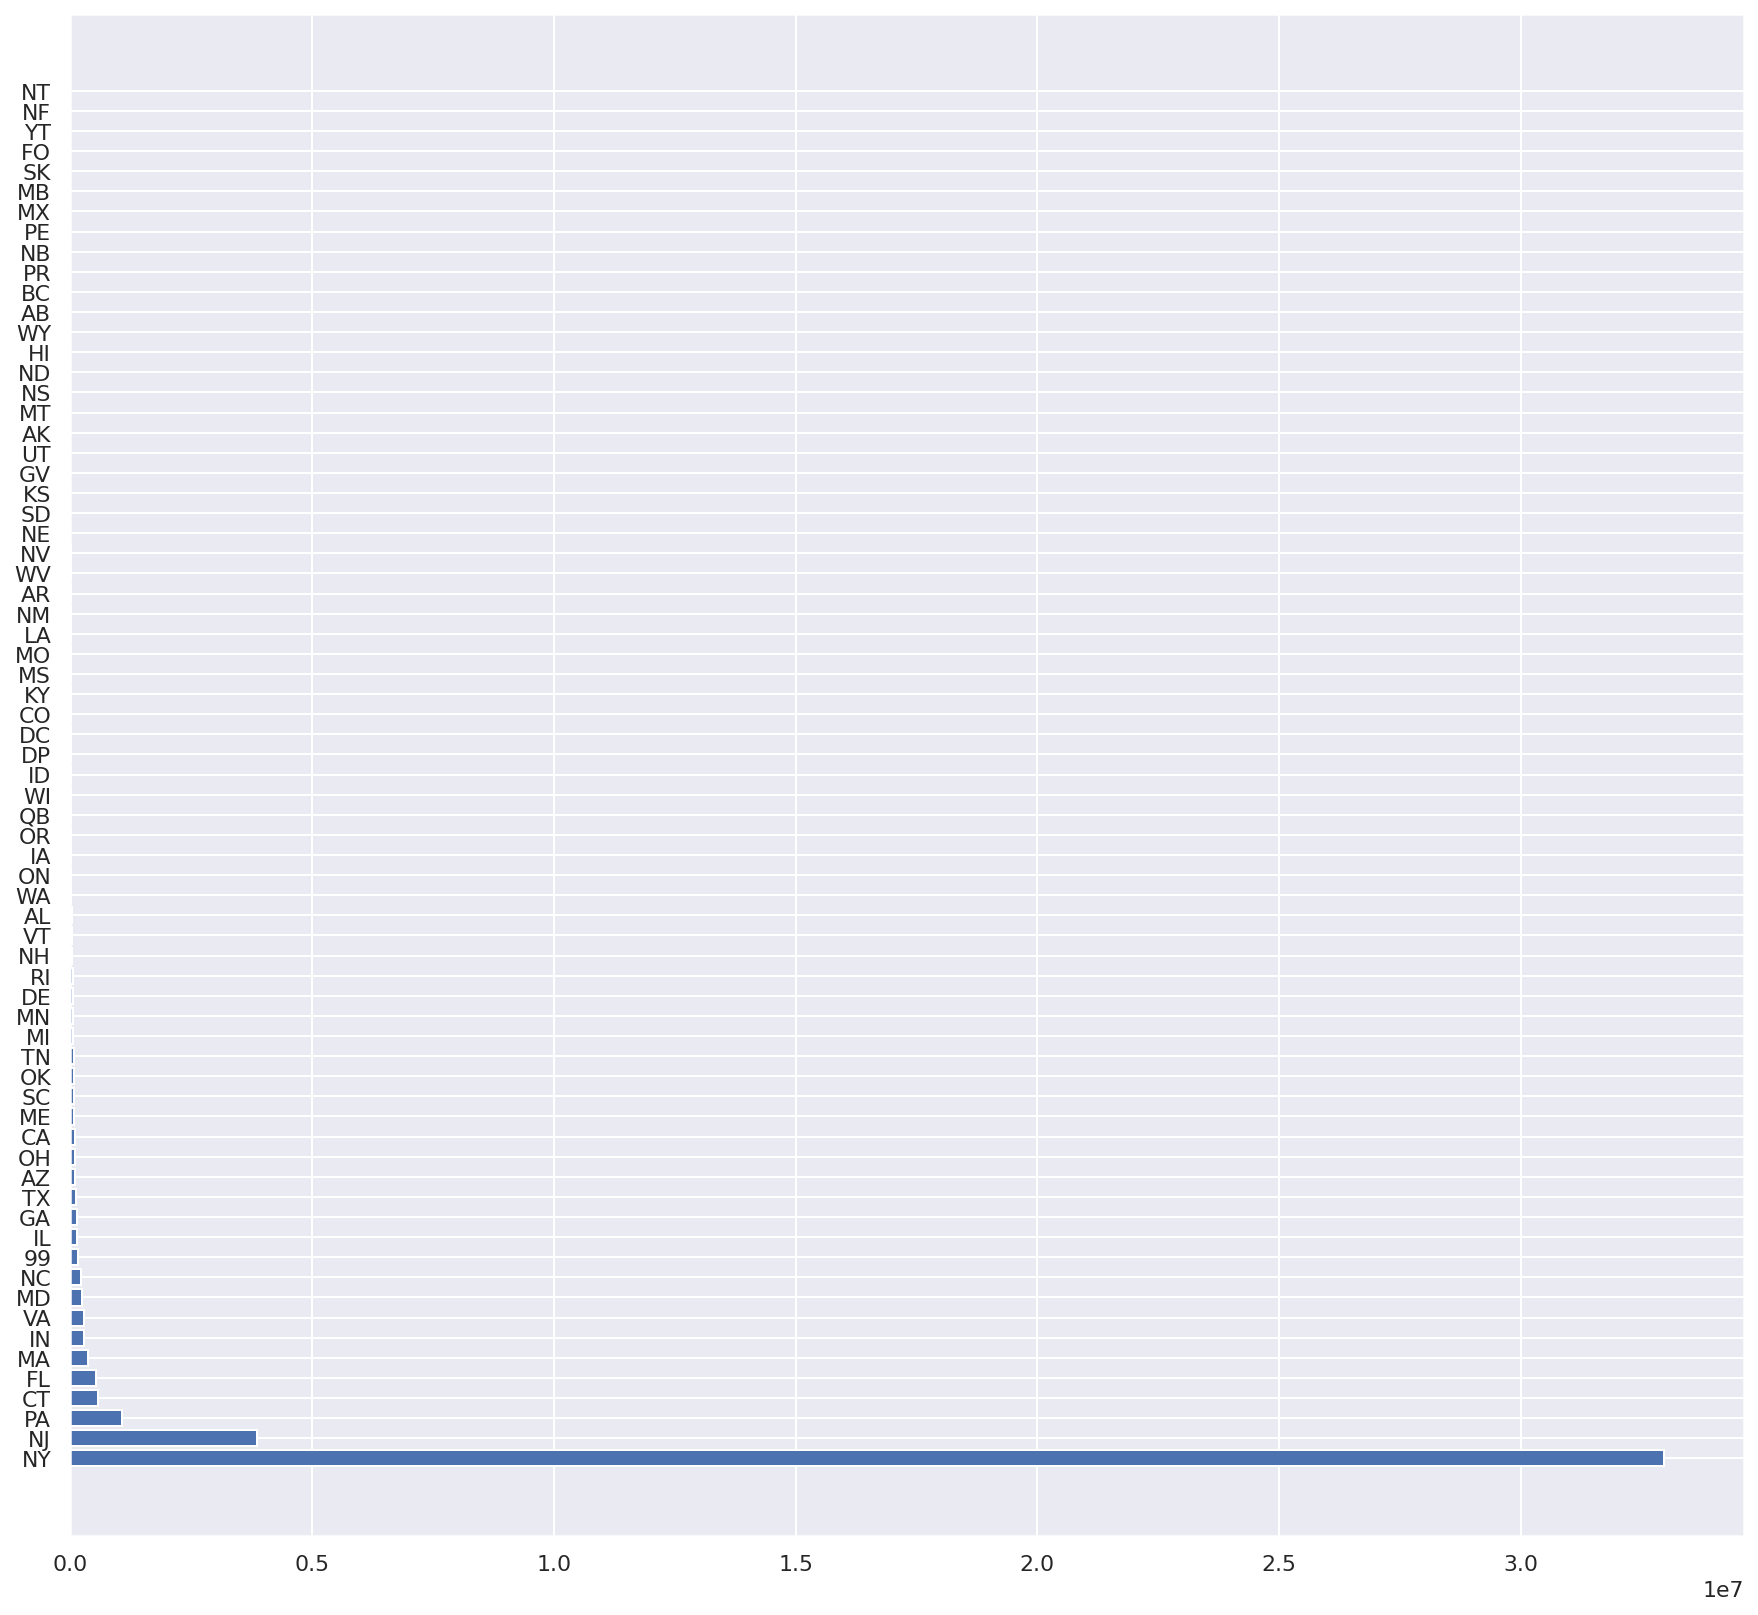

In [24]:
x_ticks = data['Registration State'].value_counts().index
heights = data['Registration State'].value_counts()
y_pos = np.arange(len(x_ticks))
fig = plt.figure(figsize=(15,14)) 
# Create horizontal bars
plt.barh(y_pos, heights)
 
# Create names on the y-axis
plt.yticks(y_pos, x_ticks)
 
# Show graphic
plt.show()

In [25]:
pd.DataFrame(data['Registration State'].value_counts()/len(data)).nlargest(10, columns = ['Registration State'])

,Registration State
NY,0.778573
NJ,0.091024
PA,0.025254
CT,0.013783
FL,0.012848
MA,0.008608
IN,0.006949
VA,0.006853
MD,0.005571
NC,0.005135


You can see from the barplot above: in our sample ~77.85% cars are registered in state : NY. After that 9.10% cars are registered in state : NJ, followed by PA, CT, and FL.

# How many parking tickets are given for each violation code?

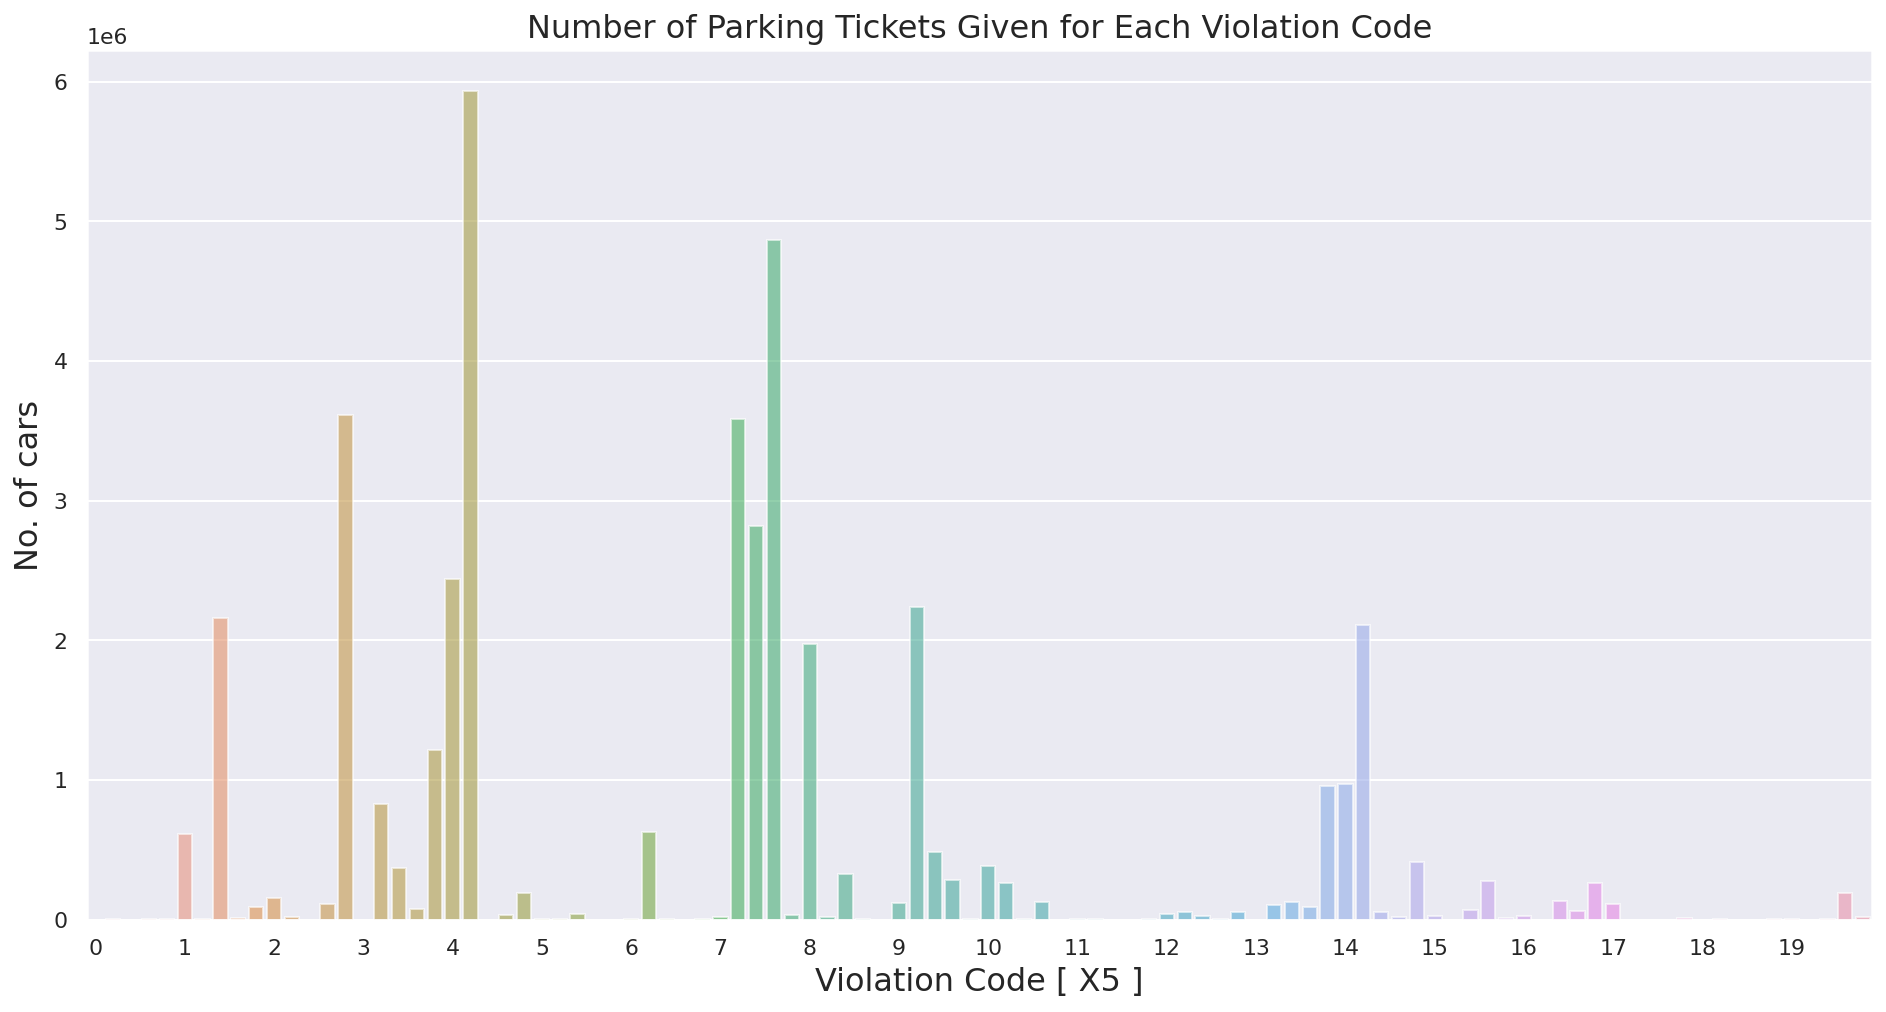

In [26]:
violation_code = data['Violation Code'].value_counts()

plt.figure(figsize=(16,8))
f = sns.barplot(y=violation_code.values, x=violation_code.index, alpha=0.6)
#plt.xticks(np.arange(0,101, 10.0))
f.set(xticks=np.arange(0,100, 5.0))
plt.title("Number of Parking Tickets Given for Each Violation Code", fontsize=16)
plt.xlabel("Violation Code [ X5 ]", fontsize=16)
plt.ylabel("No. of cars", fontsize=16)
plt.show();

# Parking ticket vs county

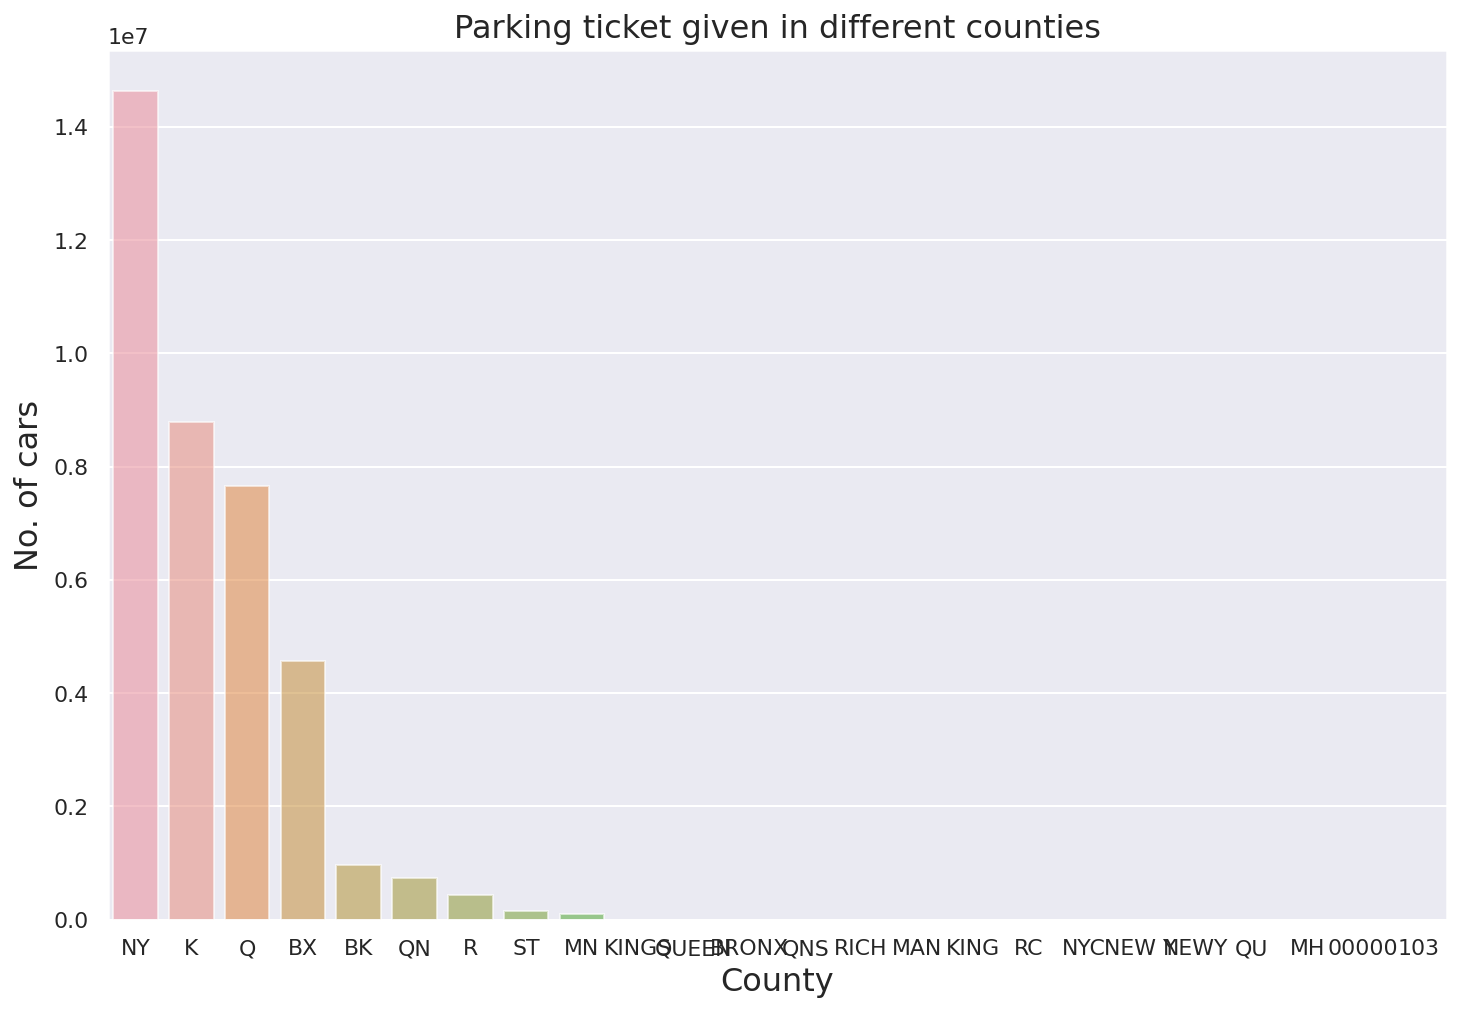

In [27]:
violation_county = data['Violation County'].value_counts()

plt.figure(figsize=(12,8))
f = sns.barplot(y=violation_county.values, x=violation_county.index, alpha=0.6)
# remove labels
plt.tick_params(labelbottom='on')
plt.ylabel('No. of cars', fontsize=16);
plt.xlabel('County', fontsize=16);
plt.title('Parking ticket given in different counties', fontsize=16);